```{index} Shear stresses torsion; Class exercise
```

(lesson14.1)=
# Lesson December 2nd

During today's lesson you'll work on a complex exercise on the topic of the Stresses due to torsion. Please ask your questions regarding the [homework](homework14.1) as well!

## Exercise Stresses due to torsion

Given is the following structure:

```{figure} intro_data/structure.svg
:align: center
```

1. Find the relevant cross-sectional properties.
2. Find the maximum shear stress and its location.
3. Find the principal stresses at that point and their directions. Draw a square stress element to represent those stresses.

````{admonition} Solution assignment 1
:class: tip, dropdown



````

````{admonition} Solution assignment 2
:class: tip, dropdown



````

````{admonition} Solution assignment 3
:class: tip, dropdown

```{figure} intro_data/stresses.svg
:align: center
```

````


Oppervlakte= 9020
Zwaartepunt =  210.0 ,  48.78048780487805
Buigtraagheidsmoment= 37249837.032520324
M_B= -1.5  , M_D= -8.25 ,M_E =  -21.75 , M_G= -35.25 , V_B= -4.5
Statisch moment A 125770.3747769185 , B= 112682.9268292683
Schuifspanning buiging tau_A= 1.3812548202365307 , tau_B = 1.2375238295771624
Wringmoment op D= -1.75 , wringmoment op E= -15.75
wringtraagheidsmoment= 363806.6666666666
tau_wring= -476.21447288853057
tau_totaal= -474.83321806829406
sigma_buiging= -143.10096981697822
sigma_druk= -0.2660753880266075
sigma_min= -551.8971338150498
sigma_max= 408.5300886100449


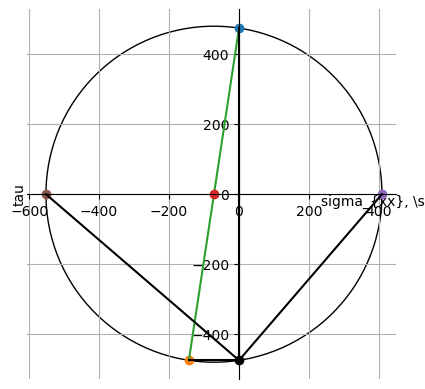

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

L_AB = 1.0
L_BD = 1.5
L_DE = 3.0
L_EG = 3.0
q_z = 9
q_x = 7
F_A = 2.4
h = 200
b = 420
t = 11
E = 210e9
G = 80e9

Ar_1 = h*t
Ar_2 = b*t
Ar_3 = h*t
Ar = Ar_1 + Ar_2 + Ar_3
print('Oppervlakte=',Ar)
C_z1 = h/2
C_z2 = 0
C_z3 = h/2
S_z1 = Ar_1*C_z1
S_z2 = Ar_2*C_z2
S_z3 = Ar_3*C_z3

yc = b/2
zc = (S_z1+S_z2+S_z3)/Ar
print('Zwaartepunt = ',yc,', ',zc)

Izz_1_e = (1/12)*t*h**3
Izz_1_v = Ar_1*(C_z1-zc)**2
Izz_2_e = (1/12)*b*t**3
Izz_2_v = Ar_2*(C_z2-zc)**2
Izz_3_e = (1/12)*t*h**3
Izz_3_v = Ar_3*(C_z3-zc)**2
Izz = Izz_1_e + Izz_1_v + Izz_2_e + Izz_2_v + Izz_3_e + Izz_3_v

print("Buigtraagheidsmoment=",Izz)

M_B = -q_z*L_AB*0.5*L_AB/3
M_D = -q_z*L_AB*0.5*(L_AB/3+L_BD)
M_E = -q_z*L_AB*0.5*(L_AB/3+L_BD+L_DE)
M_G = -q_z*L_AB*0.5*(L_AB/3+L_BD+L_DE+L_EG)
V_B = -q_z*L_AB*0.5

print("M_B=",M_B," , M_D=",M_D,',M_E = ',M_E,', M_G=',M_G,', V_B=',V_B)

#hzwaartepunt, hoekpunt

S_A = (h-zc)**2*t/2
S_B = h*t*(1/2*h-zc)
print('Statisch moment A',S_A,', B=',S_B)
tau_A = -(V_B*1e3 * S_A )/ (t*Izz)
tau_B = -(V_B*1e3 * S_B )/ (t*Izz)

print('Schuifspanning buiging tau_A=',tau_A,', tau_B =',tau_B)

M_t_D = -q_x/(L_DE+L_BD)*L_BD*L_BD/2
M_t_E = -q_x*(L_DE+L_BD)/2

print('Wringmoment op D=',M_t_D,', wringmoment op E=',M_t_E)
It = 1/3*b*t**3+1/3*h*t**3*2
print('wringtraagheidsmoment=',It)
tau_wring = M_t_E*1e6*t/2 / (0.5*It)
print('tau_wring=',tau_wring)
tau_totaal = tau_wring + tau_A
print('tau_totaal=',tau_totaal)

sigma_buiging = M_G*1e6 * (h-zc) / Izz
print('sigma_buiging=',sigma_buiging)

sigma_druk = -F_A*1e3 / Ar
print('sigma_druk=',sigma_druk)

tau = tau_totaal
sigma_x = sigma_buiging + sigma_druk
sigma_z = 0

sigma_min = (sigma_z+sigma_x)/2-np.sqrt(((sigma_z-sigma_x)/2)**2+tau**2)
sigma_max = (sigma_z+sigma_x)/2+np.sqrt(((sigma_z-sigma_x)/2)**2+tau**2)
alpha = np.arctan(2*tau/(sigma_z-sigma_x))/2
tau_max = np.sqrt(((sigma_z-sigma_x)/2)**2+tau**2)
print('sigma_min=',sigma_min)
print('sigma_max=', sigma_max)
#print(np.rad2deg(alpha_tau))


plt.figure()
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect('equal')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_color('none')
plt.grid()
if sigma_min<0:
    plt.xlim([1.1*sigma_min,1.1*sigma_max])
else:
    plt.xlim([0.7*sigma_min,1.1*sigma_max])
plt.ylim([-1.1*tau_max,1.1*tau_max])
plt.xlabel('sigma_{xx}, \sigma_{zz}}')
ax.xaxis.set_label_coords(1.05, 0.5)
ax.yaxis.set_label_coords(0,0.95)
plt.ylabel('tau')
plt.plot(sigma_z,-tau,marker='o')
plt.plot(sigma_x,tau,marker='o')
plt.plot([sigma_z,sigma_x],[-tau,tau])
plt.plot((sigma_x+sigma_z)/2,0,marker='o')
circle1 = plt.Circle([(sigma_x+sigma_z)/2,0],np.sqrt(((sigma_x-sigma_z)/2)**2+tau**2),fill=False)
ax.add_artist(circle1)
plt.plot(sigma_max,0,marker='o')
plt.plot(sigma_min,0,marker='o')
plt.plot([sigma_z,sigma_z],[+tau,-tau],color='black')
plt.plot([sigma_z,sigma_x],[tau,tau],color='black')
plt.plot(sigma_z,tau,marker='o',color='black')
plt.plot([sigma_min,sigma_z],[0,tau],color='black')
plt.plot([sigma_z,sigma_max],[tau,0],color='black')